**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip -q install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('/content/sample_data/Restaurante2.1.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

In [ ]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2'}
0.8


In [ ]:
X_treino

array([[0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 1, 0, 1, 0, 3],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 1, 0, 0, 0, 2],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 1, 2, 0, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 0, 2, 0, 1, 0],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 0, 1, 1, 1, 0]], dtype=object)

**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [ ]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='entropy', max_features=0.4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=0.4)



> **Vamos testar o modelo?**



In [ ]:

previsoes = modelo.predict(X_teste)

In [ ]:
previsoes

array(['Sim', 'Nao', 'Sim'], dtype=object)



> **Será se o modelo acertou?**



In [ ]:
y_teste

array(['Nao', 'Sim', 'Nao'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.0

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 2],
       [1, 0]])

0.0

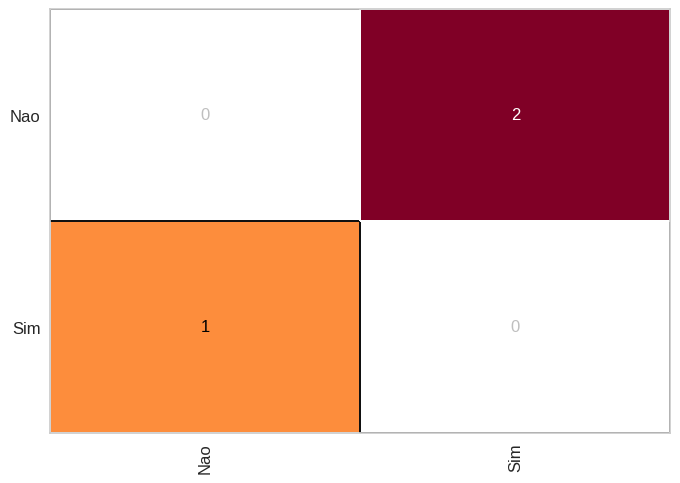

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.00      0.00      0.00       2.0
         Sim       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



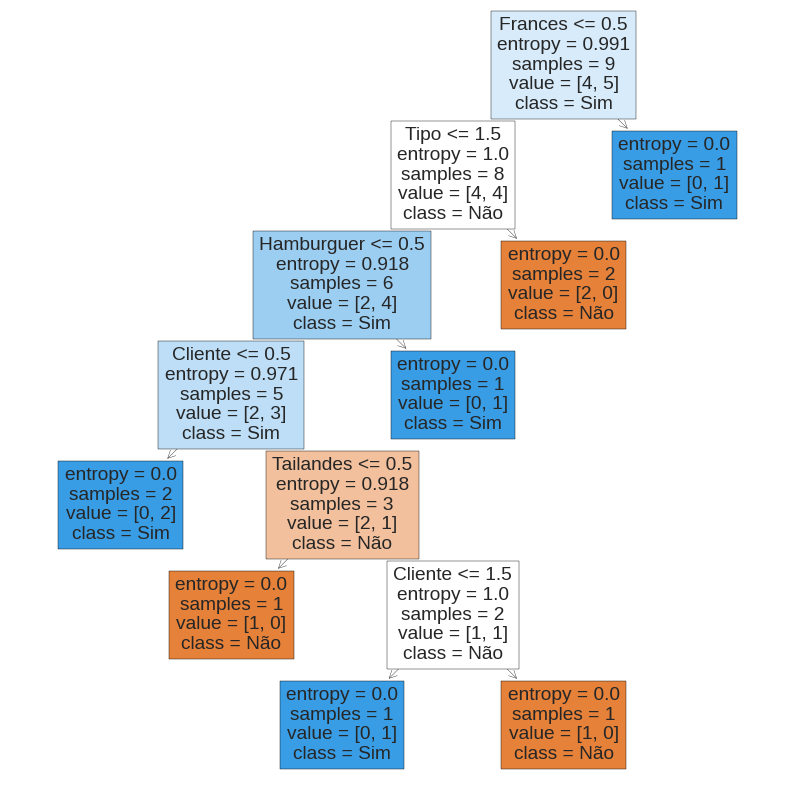

In [ ]:
from sklearn import tree
previsores = ['Frances', 'Hamburguer', 'Italiano', 'Tailandes', 'Alternativo', 'Bar', 'SextaSabado', 'Fome', 'Cliente', 'Preco','Chuva','Res','Tipo', 'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = ['Não', 'Sim'], filled=True);